In [1]:
import seaborn as sns

In [2]:
import pandas as pd # import pandas for dataframes
import numpy as np
from sklearn.datasets import load_boston # import data from sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline 
boston = load_boston() 
df = pd.DataFrame(boston.data)
df.columns= boston.feature_names
df['price']= boston.target


In [3]:
# check description of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# check the head
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# check the tail
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [6]:
# check how many columns and rows the data has
df.shape

(506, 14)

In [7]:
# check for any missin values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

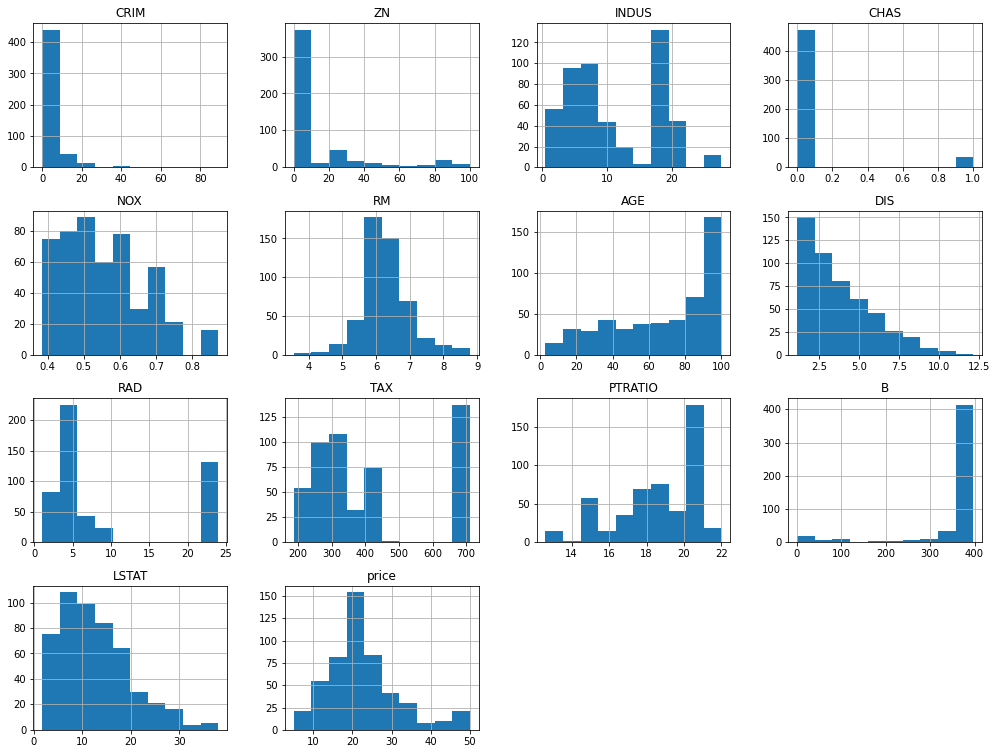

In [8]:
# draw box plots or histograms to check if there are any outliers
df.hist(bins=10, figsize=(17,13))

In [9]:
# check correlation in the data
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
#define X variables and our target(y). 

X = df[['RM', 'ZN', 'B']] # I used TAX before, replaced it with ZN
y = df[['price']]
# select only price as y and select another column of your choice as X

In [11]:
# import tran test split from sklearn
from sklearn.model_selection import train_test_split

In [12]:
# split data with 25% as test and remaining as train, use random state of 49
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

In [13]:
# print out the shape of Xtrain, ytrain, Xtest and ytest
print(f"X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}")

X_train: (379, 3) 
X_test: (127, 3) 
y_train: (379, 1) 
y_test: (127, 1)


## Preprocessing 

#### Feature Scaling
Feature scaling will help us to see all the variables from the same lens (same scale). It can be done in two ways:

* Opt. 1- Minmax
-> Rescales data into a range of [0,1].
-> The outliers from the data set are lost.


* Opt. 2- Z-score (more recommended)
-> Rescales data to have a mean of 0 and standard deviation of 1.
-> Less effected by outliers.

Numeric feature column must be re-scaled. Rescaling of numeric features is extremely important. 
For example, consider a data set with two features, age in years, typically measured in a few tens, and income, typically measured in tens or hundreds of thousands. There is no reason to believe that income is more important than age in some model, simply because its range of values is greater. To prevent this problem numeric features are scaled to the same range. 
There are many possible scaling methods. One simple method is known as **Min-Max** normalization. The data are scaled using the following formula to be in the range $\{ 0,1 \}$:

$$x\_scaled_i = \frac{(x_i - Min(x))}{(Max(x) - Min(x))}$$

where,
$x_i $ is the ith sample value,
$Min(X) $ is the minimum value of all samples,
$Max(X) $ is the maximum value of all samples.

In general, Min-Max normalization is a good choice for cases where the value being scaled has a complex distribution. For example, a variable with a distribution with multiple modes might be a good candidate for Min-Max normalization. Notice that the presence of a few outliers can distort the result by giving unrepresentative values of $Min(X)$ or $Max(X)$.


Z-Score normalization transforms a variable so that it has zero mean and unit standard deviation (or variance). Z-Score normalization is performed using the following formula:

$$x\_scaled_i = \frac{\big(x_i - \mu \big)}{\sigma}$$

where,
$\mu $ is the mean of the variable $X$,
$\sigma $ is the standard deviation of the variable $X$.

In [14]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()

# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)

In [15]:
#Minmax scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test = n_scaler.transform(X_test.astype(np.float))

In [16]:
#Z score scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

### Model Training

In [17]:
from sklearn.linear_model import LinearRegression


In [18]:
# instantiate the linear regression model and call it "model"
model = LinearRegression()

In [19]:
# Fit model to your train data
model.fit(X_train, y_train)

LinearRegression()

### Evaluation 

In [20]:
# Print your slope and intercept
print(model.intercept_)
print(model.coef_)

[22.47255937]
[[5.74158262 1.03681093 1.82384908]]


In [21]:
# use your model to predict Xtest
def plot_regression(x, y_score, y):
    ## Plot the result
    sns.regplot(x=x, y=y, fit_reg=False)
    plt.plot(x, y_score, c = 'red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Fit of model to test data')

y_score = model.predict(X_test.reshape(-1,3)) 

# plot_regression(X_test, y_score, y_test)

In [22]:
import sklearn.metrics as sklm

In [23]:
# calculate the MSE
print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_test, y_score)))

Mean Square Error      = 29.984851724538785


/home/evel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


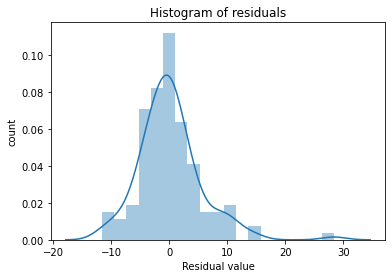

In [24]:
# plot a distribution plot of the residuals
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.values.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

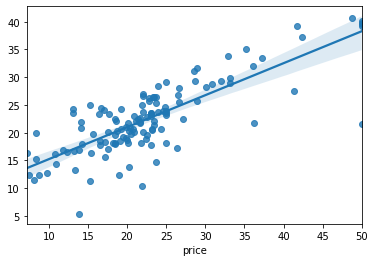

In [25]:
# plot a scatter plot of predictions and ytest
rp = sns.regplot(x=y_test, y=y_score)

<AxesSubplot:>

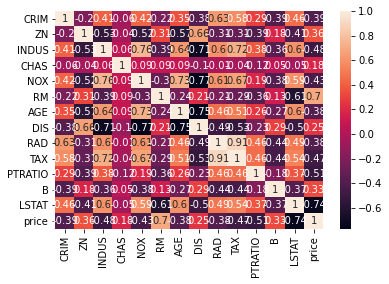

In [26]:
## Heat Map
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [27]:
## Getting the model ready for deployment
import pickle

with open(f'model/boston_model.pkl', 'wb') as file:
    pickle.dump(model,file)

FileNotFoundError: [Errno 2] No such file or directory: 'model/boston_model.pkl'